In [23]:
# Import libraries and read csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

df = pd.read_csv('TechChallenge_Data.xlsx - Sheet1.csv')

In [24]:
# Basic Dataset Overview

df.info()
print(df.shape)
df.columns.tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Month                   9999 non-null   object 
 1   AustralianPort          9999 non-null   object 
 2   ForeignPort             9999 non-null   object 
 3   Country                 9999 non-null   object 
 4   Passengers_In           9999 non-null   int64  
 5   Freight_In_(tonnes)     9999 non-null   float64
 6   Mail_In_(tonnes)        9999 non-null   float64
 7   Passengers_Out          9999 non-null   int64  
 8   Freight_Out_(tonnes)    9999 non-null   float64
 9   Mail_Out_(tonnes)       9999 non-null   float64
 10  Passengers_Total        9999 non-null   int64  
 11  Freight_Total_(tonnes)  9999 non-null   float64
 12  Mail_Total_(tonnes)     9999 non-null   float64
 13  Year                    9999 non-null   int64  
 14  Month_num               9999 non-null   

['Month',
 'AustralianPort',
 'ForeignPort',
 'Country',
 'Passengers_In',
 'Freight_In_(tonnes)',
 'Mail_In_(tonnes)',
 'Passengers_Out',
 'Freight_Out_(tonnes)',
 'Mail_Out_(tonnes)',
 'Passengers_Total',
 'Freight_Total_(tonnes)',
 'Mail_Total_(tonnes)',
 'Year',
 'Month_num']

In [25]:
# Data Cleaning

# Copying dataframe
df_cleaned = df.copy()

# Checking for missing values
print(df_cleaned.isnull().sum())

# Creating Date Column and droppping redudant cols
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Year'].astype(str) + '-' + df_cleaned['Month_num'].astype(str),
format = '%Y-%m')

df_cleaned = df_cleaned.drop(columns = ['Month', 'Year', 'Month_num'])


# Creating Standardized Route Column and dropping redundant cols
df_cleaned['Route'] = df_cleaned['AustralianPort'] + ' - ' + df_cleaned['ForeignPort']
df_cleaned = df_cleaned.drop(columns = ['AustralianPort', 'ForeignPort'])


df_cleaned.head()



Month                     0
AustralianPort            0
ForeignPort               0
Country                   0
Passengers_In             0
Freight_In_(tonnes)       0
Mail_In_(tonnes)          0
Passengers_Out            0
Freight_Out_(tonnes)      0
Mail_Out_(tonnes)         0
Passengers_Total          0
Freight_Total_(tonnes)    0
Mail_Total_(tonnes)       0
Year                      0
Month_num                 0
dtype: int64


,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Date,Route
0,New Zealand,1513,42.167,0.311,985,18.704,0.924,2498,60.871,1.235,1985-01-01,Adelaide - Auckland
1,Bahrain,12,0.000,0.000,5,0.033,0.000,17,0.033,0.000,1985-01-01,Adelaide - Bahrain
2,India,7,0.000,0.000,5,0.000,0.000,12,0.000,0.000,1985-01-01,Adelaide - Bombay
3,Germany,115,0.009,0.000,171,0.000,0.248,286,0.009,0.248,1985-01-01,Adelaide - Frankfurt
4,UK,1567,2.800,0.000,1472,10.618,2.487,3039,13.418,2.487,1985-01-01,Adelaide - London


In [26]:
#1 Understanding Data

In [27]:
# 1a. Identify most and least trafficked routes (Passenger Traffic)

# Total Passengers by Route
route_traffic = df_cleaned.groupby('Route')['Passengers_Total'].sum().sort_values(ascending = False)
route_traffic.head()

# Display Top 10 Trafficked routes (Total Passengers)
print('Top 10 Trafficked Routes:\n')
print(route_traffic.head(10))

# Display Bottom 10 least busy routes (Total Passengers)
print('\nBottom 10 Least Trafficked Routes:\n')
print(route_traffic.tail(10))



Top 10 Trafficked Routes:

Route
Sydney - Auckland        2961212
Sydney - Singapore       1440018
Sydney - Tokyo           1292116
Sydney - Hong Kong       1151900
Perth - Singapore         952926
Brisbane - Auckland       893246
Sydney - Christchurch     882357
Melbourne - Singapore     865251
Sydney - Los Angeles      862964
Sydney - Honolulu         861814
Name: Passengers_Total, dtype: int64

Bottom 10 Least Trafficked Routes:

Route
Hobart - Los Angeles           2
Hobart - Tokyo                 1
Cairns - Honiara               1
Townsville - San Francisco     1
Darwin - Zagreb                1
Melbourne - Denver             0
Perth - Bandar Seri Begawan    0
Brisbane - Colombo             0
Adelaide - Harare              0
Brisbane - Chicago             0
Name: Passengers_Total, dtype: int64


In [28]:
#1b. Analyze trends and/or geographical patterns

In [29]:
# How has Overall Passenger Traffic changed across regions over time (1985-1989)?


# Getting Monthly Passengers (Route and Country)
monthly_country_trends = (df_cleaned
    .groupby([df_cleaned['Date'].dt.to_period('M'), 'Country'])
    ['Passengers_Total'].sum()
    .reset_index()
    .rename(columns={'Date': 'Month', 'Passengers_Total': 'Monthly_Passengers'})
    )

print('\nMonthly Passenger Traffic Trends by Country:\n')
print(monthly_country_trends.head())


monthly_route_trends = (df_cleaned
    .groupby([df_cleaned['Date'].dt.to_period('M'), 'Route'])
    ['Passengers_Total'].sum()
    .reset_index()
    .rename(columns={'Date': 'Month', 'Passengers_Total': 'Monthly_Passengers'})
    )


print('\nMonthly Passenger Traffic Trends by Route:\n')
print(monthly_route_trends.head())





Monthly Passenger Traffic Trends by Country:

     Month  Country  Monthly_Passengers
0  1985-01  Bahrain                 623
1  1985-01   Brunei                 841
2  1985-01   Canada                3178
3  1985-01    China                4654
4  1985-01   Cyprus                  57

Monthly Passenger Traffic Trends by Route:

     Month                 Route  Monthly_Passengers
0  1985-01   Adelaide - Auckland                2498
1  1985-01    Adelaide - Bahrain                  17
2  1985-01     Adelaide - Bombay                  12
3  1985-01  Adelaide - Frankfurt                 286
4  1985-01     Adelaide - London                3039


In [30]:
# Which Regions and Routes have shown the fastest growths and shrinks over time? (Compound Monthly Growth Rate)
# CMGR Formula = (Passengers end/start)^1/n - 1

# making sure earliest and latest month per country in correct order
monthly_country_trends = monthly_country_trends.sort_values(['Country', 'Month'])


# Country CMGR

# Getting Dataframe for Calculations (Country CMGR)
country_growth = (monthly_country_trends.groupby('Country')
        .agg(
        start_passengers = ('Monthly_Passengers', 'first'),
        end_passengers   = ('Monthly_Passengers', 'last'),
        months           = ('Month', 'nunique')
        )
        .reset_index()
        )

# Calculating CMGR
country_growth['CMGR'] = ((country_growth['end_passengers'] / country_growth['start_passengers']) ** 
                          (1 / country_growth['months']) - 1) * 100

# Changing inf to NaN
country_growth['CMGR'] = country_growth['CMGR'].replace([np.inf, -np.inf], np.nan)

# Displaying Top and Bottom 10 Countries CMGR
print('\nTop 10 countries by monthly CMGR (%):\n')
print(country_growth.sort_values('CMGR', ascending=False)[['Country', 'CMGR']].head(10).round(2).to_string(index=False))


# Route CMGR

# Getting Dataframe for Calculations (Route CMGR)
route_growth = (monthly_route_trends.groupby('Route')
        .agg(
        start_passengers = ('Monthly_Passengers', 'first'),
        end_passengers   = ('Monthly_Passengers', 'last'),
        months           = ('Month', 'nunique')
        )
        .reset_index()
        )

# Calculating CMGR
route_growth['CMGR'] = ((route_growth['end_passengers'] / route_growth['start_passengers']) ** 
                        (1 / route_growth['months']) - 1) * 100

# Changing inf to NaN
route_growth['CMGR'] = route_growth['CMGR'].replace([np.inf, -np.inf], np.nan)

# Displaying Top and Bottom 10 Routes CMGR
print('\nTop 10 routes by monthly CMGR (%):\n')
print(route_growth.sort_values('CMGR', ascending=False)[['Route', 'CMGR']].head(10).round(2).to_string(index=False))



Top 10 countries by monthly CMGR (%):

        Country  CMGR
           Guam 41.67
        Austria  9.93
         Cyprus  8.67
         Brunei  0.96
   Cook Islands  0.74
Solomon Islands  0.53
       Zimbabwe  0.46
           Fiji  0.14
        Denmark  0.00
          Malta  0.00

Top 10 routes by monthly CMGR (%):

                  Route   CMGR
         Perth - Zagreb 192.40
       Sydney - Honiara 157.13
      Adelaide - Zagreb 138.05
  Darwin - Christchurch 106.06
Adelaide - Kuala Lumpur  98.09
     Brisbane - Beijing  88.60
   Adelaide - Vancouver  76.76
 Townsville - Amsterdam  71.00
     Melbourne - Harare  66.10
  Townsville - Honolulu  58.11


In [31]:
# Analyzing Seasonal Trends Across Regions and Routes

# Adding Year and Month Columns to Dataframe
monthly_country_trends['Year'] = monthly_country_trends['Month'].dt.year 
monthly_country_trends['Month_Num'] = monthly_country_trends['Month'].dt.month 

monthly_route_trends['Year'] = monthly_route_trends['Month'].dt.year 
monthly_route_trends['Month_Num'] = monthly_route_trends['Month'].dt.month 


# Average Monthly Volume Per Country
country_seasonality = (monthly_country_trends.groupby(['Country', 'Month_Num'])
                      ['Monthly_Passengers'].mean()
                      .reset_index()
                      .rename(columns = {'Monthly_Passengers': 'Avg_Monthly_Passengers'})
                      )

# Average Monthly Passengers Per Route
route_seasonality = (monthly_route_trends.groupby(['Route', 'Month_Num'])
                      ['Monthly_Passengers'].mean()
                      .reset_index()
                      .rename(columns = {'Monthly_Passengers': 'Avg_Monthly_Passengers'})
                      )



# Identifying top 5 countries and routes by total traffic

top_countries = (monthly_country_trends.groupby('Country')
                ['Monthly_Passengers'].sum()
                .nlargest(5)
                .index)

top_routes = (monthly_route_trends.groupby('Route')
                ['Monthly_Passengers'].sum()
                .nlargest(5)
                .index)

# Filtering seasonality dfs to top countries and routes

country_seasonality_top = country_seasonality[country_seasonality['Country'].isin(top_countries)]
route_seasonality_top = route_seasonality[route_seasonality['Route'].isin(top_routes)]

print('\nTop 5 Countries — Average Monthly Passenger Trends (Month 1–12):\n')
print(country_seasonality_top.sort_values(['Country', 'Month_Num']).to_string(index=False))

print('\nTop 5 Routes — Average Monthly Passenger Trends (Month 1–12):\n')
print(route_seasonality_top.sort_values(['Route', 'Month_Num']).to_string(index=False))



Top 5 Countries — Average Monthly Passenger Trends (Month 1–12):

    Country  Month_Num  Avg_Monthly_Passengers
  Hong Kong          1                46147.40
  Hong Kong          2                40099.00
  Hong Kong          3                41923.20
  Hong Kong          4                39712.60
  Hong Kong          5                37312.40
  Hong Kong          6                36047.20
  Hong Kong          7                30369.00
  Hong Kong          8                43531.00
  Hong Kong          9                40899.75
  Hong Kong         10                42395.00
  Hong Kong         11                41177.75
  Hong Kong         12                46846.25
      Japan          1                31548.60
      Japan          2                30745.00
      Japan          3                34514.80
      Japan          4                32330.20
      Japan          5                31900.00
      Japan          6                31260.00
      Japan          7                21

In [32]:
#1c. Visualizations to demonstrate trends + patterns determined in part b

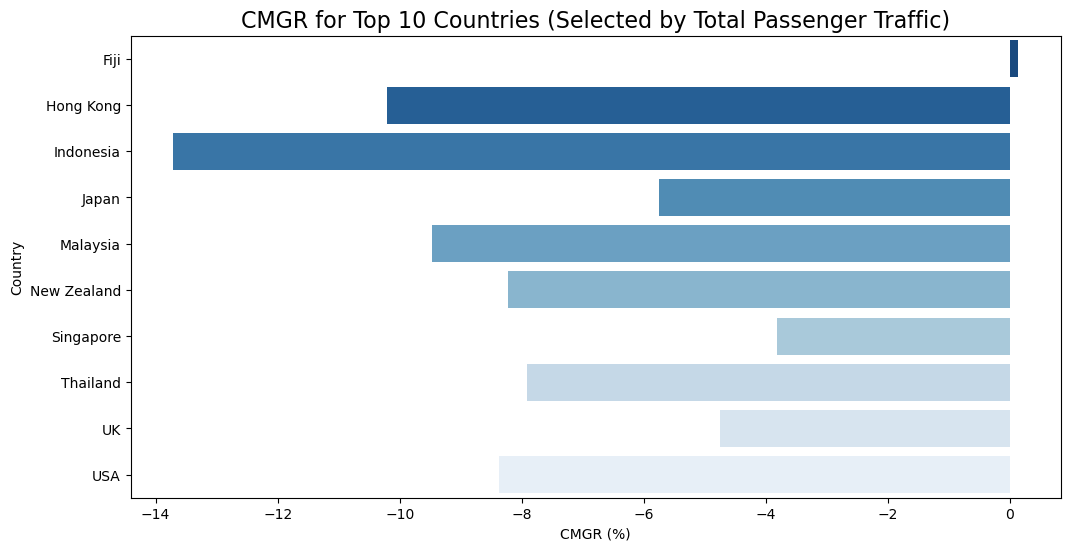

In [33]:
# Visualization 1 CMGR for Countries and Routes


# Get top 10 countries by total passengers
top10_countries = (monthly_country_trends
    .groupby('Country')['Monthly_Passengers']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index)


# Filtering CMGR for only these top 10 countries by total passangers
top10_country_growth = country_growth[country_growth['Country'].isin(top10_countries)]

# Plotting data
plt.figure(figsize = (12, 6))
sns.barplot(data = top10_country_growth, y = 'Country', x = 'CMGR', orient = 'h', palette = 'Blues_r')
plt.title('CMGR for Top 10 Countries (Selected by Total Passenger Traffic)', fontsize = 16)
plt.xlabel('CMGR (%)')
plt.ylabel('Country')

plt.show()


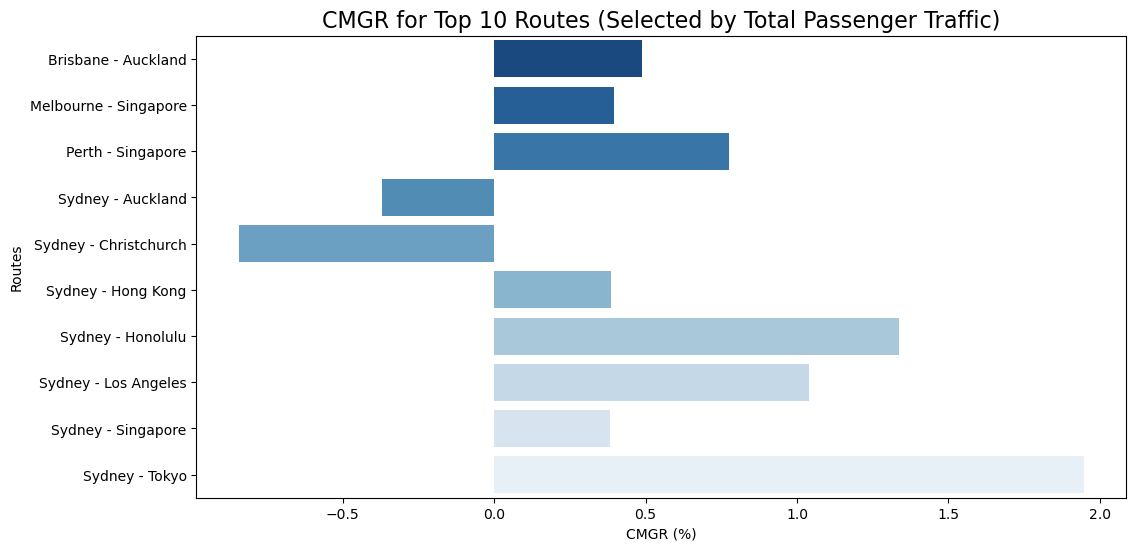

In [34]:
# Get top 10 routes by total passengers
top10_routes = (monthly_route_trends
    .groupby('Route')['Monthly_Passengers']
    .sum()
    .sort_values(ascending = False)
    .head(10)
    .index)


# Filtering CMGR for only these top 10 routes by total passangers
top10_route_growth = route_growth[route_growth['Route'].isin(top10_routes)]


# Plotting data
plt.figure(figsize = (12, 6))
sns.barplot(data = top10_route_growth, y='Route', x='CMGR', orient='h', palette = 'Blues_r')
plt.title('CMGR for Top 10 Routes (Selected by Total Passenger Traffic)', fontsize = 16)
plt.xlabel('CMGR (%)')
plt.ylabel('Routes')

plt.show()

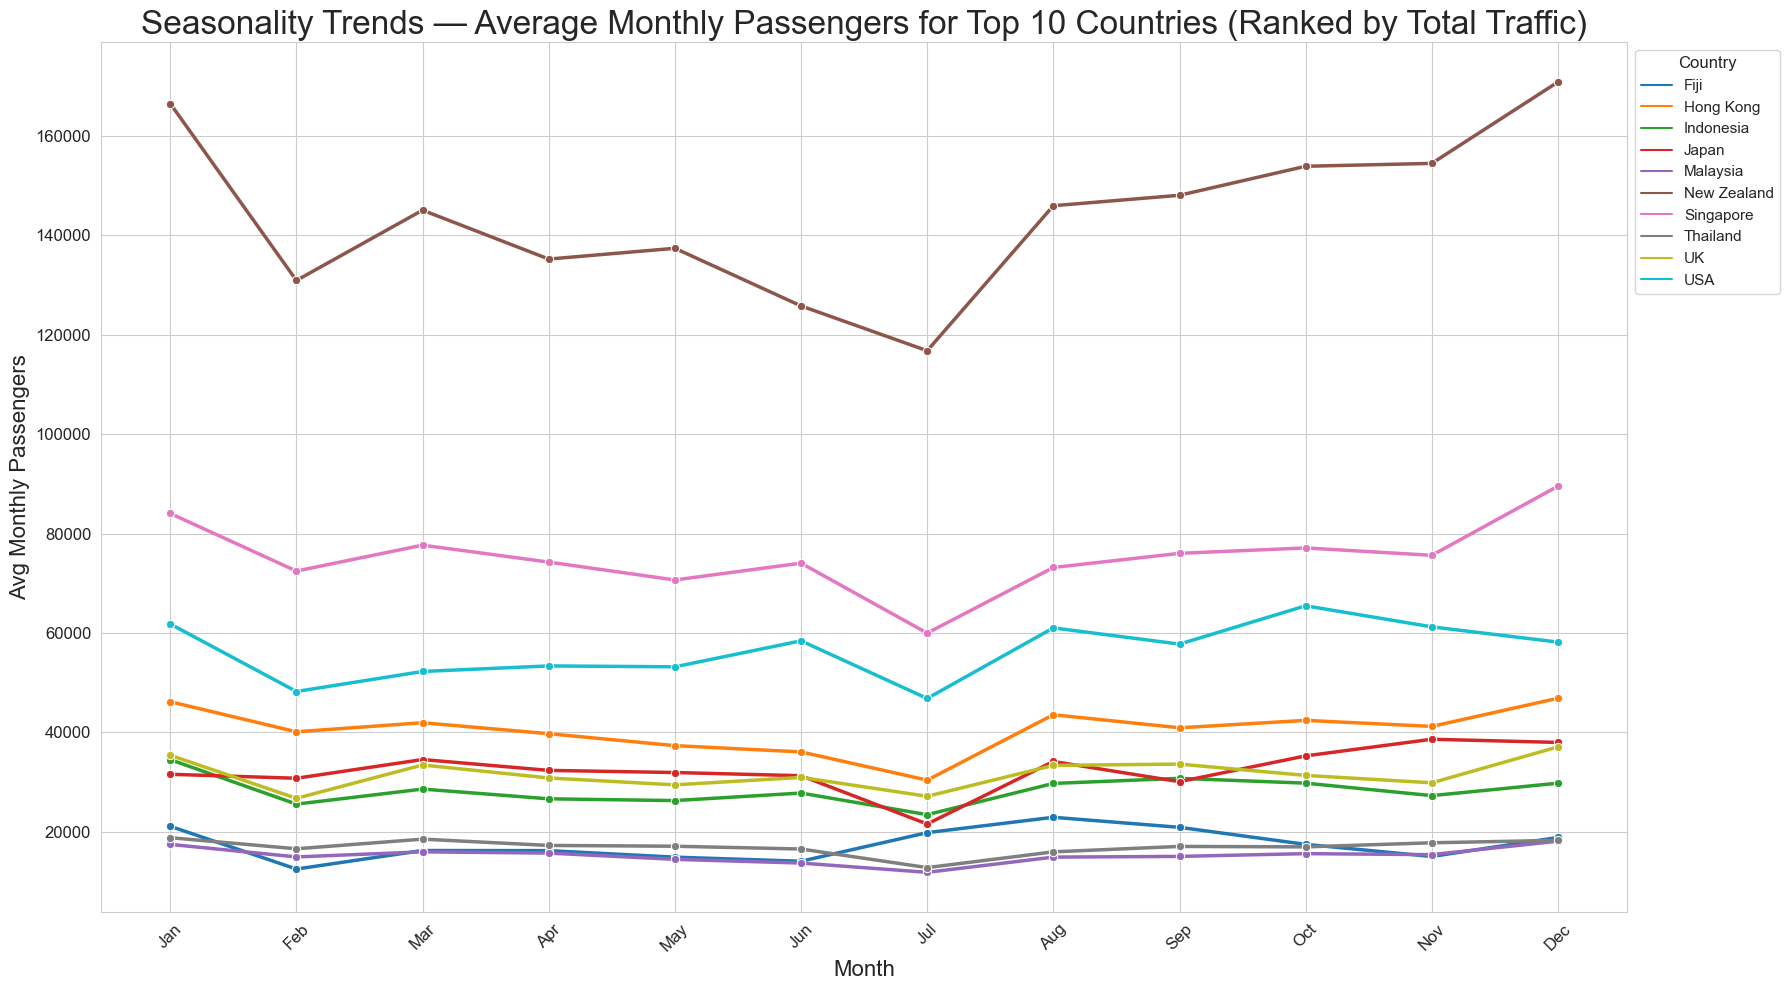

In [35]:
# Visualization 2 Seasonality Data for Countries and Routes

month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Filter seasonality data for top 10 countries only
country_seasonality_top10 = country_seasonality[country_seasonality['Country'].isin(top10_countries)].copy()


# Plotting data
plt.figure(figsize = (18, 10))
sns.set_style("whitegrid")
sns.lineplot(
    data = country_seasonality_top10,
    x = 'Month_Num',
    y = 'Avg_Monthly_Passengers',
    hue = 'Country',
    marker = 'o',
    linewidth = 2.5,
    palette = 'tab10'
)

plt.title('Seasonality Trends — Average Monthly Passengers for Top 10 Countries (Ranked by Total Traffic)', fontsize = 24)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Avg Monthly Passengers', fontsize = 16)
plt.xticks(range(1, 13), month_labels, rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(title = 'Country', fontsize = 11, title_fontsize = 12, loc = 'upper left', bbox_to_anchor = (1, 1))
plt.tight_layout()
plt.show()


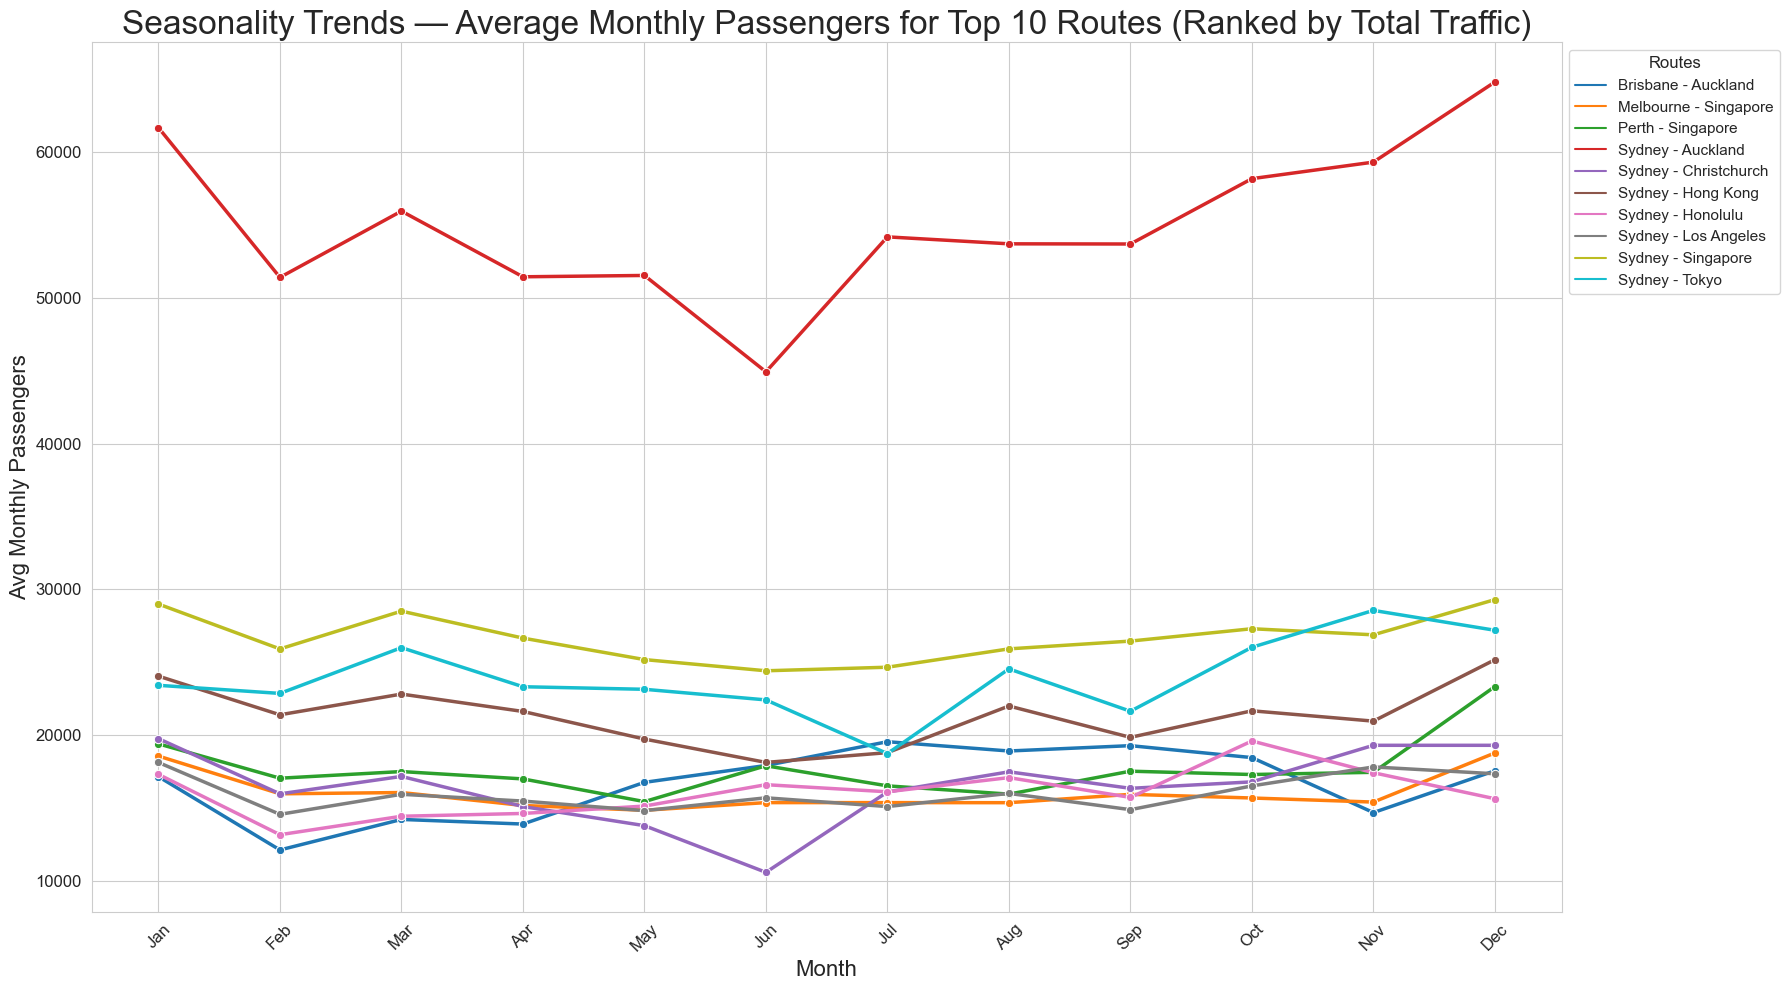

In [36]:
# Filter seasonality data for top 10 routes only
route_seasonality_top10 = route_seasonality[route_seasonality['Route'].isin(top10_routes)].copy()


# Plotting data
plt.figure(figsize = (18, 10))
sns.set_style("whitegrid")
sns.lineplot(
    data = route_seasonality_top10,
    x = 'Month_Num',
    y = 'Avg_Monthly_Passengers',
    hue = 'Route',
    marker = 'o',
    linewidth = 2.5,
    palette = 'tab10'
)

plt.title('Seasonality Trends — Average Monthly Passengers for Top 10 Routes (Ranked by Total Traffic)', fontsize = 24)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Avg Monthly Passengers', fontsize = 16)
plt.xticks(range(1, 13), month_labels, rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(title = 'Routes', fontsize = 11, title_fontsize = 12, loc = 'upper left', bbox_to_anchor = (1, 1))
plt.tight_layout()
plt.show()
